## Boosting

다양한 머신러닝 기법 중에 특히 좋은 성능을 보이는 기법으로 앙상블이 있다. 앙상블은 단일 모델이 아닌 여러 모델을 활용하여 더 나은 결과를 도출하는 기법이다.

앙상블 기법은 크게 Bagging과 Boosting이 있는데, 본문에서는 Boosting에 대해 알아볼 것이다.

Bagging에서 여러 모델의 투표를 통해 결과를 예측한다면, Boosting은 하나의 모델 $A$가 예측했을 때의 오차를 다시 다른 모델 $B$를 예측하고, 이를 반복하는 기법이다.

이 때, $A$와 $B$를 weak learner라고 한다. 즉, weak learner 여러 개를 더하여 strong learner를 만드는 것이 Boosting이라 할 수 있다.

## Boosting의 종류

대표적인 Boosting 알고리즘으로 Adaboost, Gradient Boosting, XGBoost, LightGBM 등이 있다. 

- AdaBoost(Adaptive Boosting) : 가장 기본적인 Boosting 알고리즘으로, 가중치를 통해 오차를 줄이는 방식으로 학습한다.(이전 weak learner가 틀렸던 샘플에 가중치를 더 주어 학습을 진행한다.)

- Gradient Boosting : 경사하강법 기번을 사용해 최적화 결과를 얻는다. AdaBoost와 유사하나, 가중치를 통해 오차를 줄이는 방식이 아닌, 잔여 오차를 줄이는 방향으로 학습을 진행한다.(이전 weak learner의 오차를 데이터로 삼아 새로운 weak learner에 적합시킨 후 합하는 방식이다.)

- XGBoost : Gradient Boosting의 단점을 보완하기 위해 만들어진 알고리즘으로, Gradient Boosting과 유사하나, 병렬처리를 통해 속도를 높이고, Regularization을 통해 과적합을 방지한다.

- LightGBM : XGBoost의 단점을 보완하기 위해 만들어진 알고리즘으로, XGBoost와 유사하나, 트리를 분할하는 방식이 다르다. XGBoost는 균형 트리 분할(Level Wise) 방식이고, LightGBM은 리프 중심 트리 분할(Leaf Wise) 방식이다. 즉, 최대손실 값을 가지도록 노드를 분할하기 때문에, 균형 트리 분할 방식보다 더 깊으면서 비대칭적인 트리가 생성된다.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
bc = load_breast_cancer()
data = pd.DataFrame(bc["data"], columns=bc["feature_names"])
data["target"] = bc["target"]
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [4]:
loaded = load_breast_cancer()
data, target = loaded["data"], loaded["target"]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target ,random_state=1004)

In [5]:
np.mean(y_train), np.mean(y_test)

(0.6263736263736264, 0.631578947368421)

In [6]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=10, random_state=1004)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.9385964912280702

In [7]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1004)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

In [8]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators=100, 
                                    learning_rate=0.8,
                                    random_state=1004)
adaboost_model.fit(X_train, y_train)

y_pred = adaboost_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

#### Gradient Boosting

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100,
                                      subsample=0.9,    # 90% of data
                                      learning_rate=0.08,
                                      max_depth=3,
                                      random_state=1004)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

K-Fold (cross validation)

In [10]:
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1004)
scores = []

for train_index, test_index in fold.split(data, target):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]
    
    gb_model = GradientBoostingClassifier(n_estimators=100,
                                          subsample=0.9,    # 80% of data
                                          learning_rate=0.08,
                                          max_depth=3,
                                          random_state=1004)
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)
    print(acc)

print("Mean: {:.3f}".format(np.mean(scores)))

0.9824561403508771
0.9824561403508771
0.9385964912280702
0.9736842105263158
0.9469026548672567
Mean: 0.965


#### XGBoost

In [11]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=150,
                          learning_rate=0.08,
                        #   verbosity=0,
                          gamma=1e-4,
                          subsample=0.9,
                          max_depth=10,
                          n_jobs=5,
                          random_state=1004)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9646017699115044

grid search

In [12]:
from sklearn.model_selection import GridSearchCV

xgboost_params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10, 13],
    'learning_rate': [0.01, 0.05, 0.08, 0.1],
    'reg_lambda': [0.1, 0.5, 1, 2, 5],
}

grid_tree = GridSearchCV(xgb_model, param_grid=xgboost_params, 
                         cv=5, refit=True, n_jobs=5, verbose=1)
grid_tree.fit(X_train, y_train)

print(f"Best parameters: {grid_tree.best_params_}")
print(f"Best cross-validation score: {grid_tree.best_score_}")

best_estimator = grid_tree.best_estimator_
y_pred = best_estimator.predict(X_test)
accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'reg_lambda': 1}
Best cross-validation score: 0.969326325848065


0.9646017699115044

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

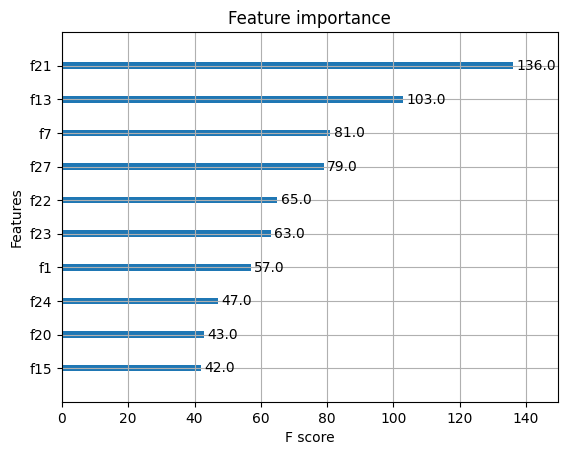

In [13]:
from xgboost import plot_importance

plot_importance(best_estimator, max_num_features=10)

#### LightGBM

In [14]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(n_estimators=50,
                            max_depth=10,
                            learning_rate=0.08,
                            subsample=0.9,
                            n_jobs=3,
                            random_state=1004)

lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.9646017699115044

더 자세한 부스팅에 대해서 알고싶다면, 다음의 참고자료를 확인해보자.

https://datascienceschool.net/03%20machine%20learning/12.03%20부스팅%20방법.html